# Project Name: <font color=#F46767>_'Laptop Selection'_</font>

Author: George Vyzaniaris<br>
Date: Aug 2025

<br>

## &#9889; _General_<br>

  - <font color='darkturquoise'>Scope</font>:
  The analysis will include and limited to laptop data which are collected from the Public store in Greece.

  - <font color='darkturquoise'>Objective</font>:
  _"To demonstrate a data-driven process so to select the most suitable laptop for a postgraduate student in economics."_

  - <font color='darkturquoise'>Remarks</font>:
  To narrow down our quest we're going to filter out our choices beforehand by setting initial rules collecting the laptop data as follows:
    - The cost should be ≤ &euro;1,500.
    - The minimum RAM should be ≥ 16GB.
    - The OS is limited to Windows environment.

<br>

## 💡 Coarse-of-Action

  - <font color='darkturquoise'>Data Collection</font>:
  As mentioned before, we'll collect the laptop specs considering the limitations we have already addressed as a .csv file.

  - <font color='darkturquoise'>Data Preparation</font>:
  Here, we are going to map categorical features based on age and quality. Next, we are going to normalize the data using the min-max normalization which will give us values between 0 and 1 along the features:
  $$value_k = \frac{x_k - x_{min}}{x_{max} - x_{min}}$$
  Beyond that, we can create new features (not necessary) from the existing ones. This project will apply minor feature engineering.

  - <font color='darkturquoise'>Criteria Selection</font>:
  Here, we are going to select which features we prefer to include to our evaluation, along with their respective weights.
  
  - <font color='darkturquoise'>Scoring System</font>:
  The scoring system will sum up the weighted values of selected features:
  $$score_i = \sum_{k=1}^{n}v_{ik} * w_k$$
  Where:
    - $v_{ik}$: the value of laptop i in k-feature
    - $w_k$: the weight of the k-feature.

  This score allows for objective ranking of laptops based on user's preferences, tailored to actual student needs.

  - <font color='darkturquoise'>Decision-making</font>:
  Sorting the scores so to announce the top candidate laptop.


<br>

##<img src="https://img.icons8.com/?size=100&id=yTvVS6whPDpp&format=png&color=000000" width="25" height="25"/> Main File Structure

&emsp;&emsp;
<img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='20' height='20'/> laptop_project/<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=fm9x3sNnCASo&format=png&color=000000" width='20' height='20'/> raw_data.csv<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=13441&format=png&color=000000" width='25' height='25'/> laptop_selection.ipynb<br>
&emsp;&emsp;
&#x251C;&#x2500; <img src="https://img.icons8.com/?size=100&id=43817&format=png&color=FCC419" width='20' height='20'/> images/<br>
&emsp;&emsp;
&#x2514;&#x2500; <img src="https://img.icons8.com/?size=100&id=VUckOuTyLQ7W&format=png&color=19B1FC" width='25' height='25'/> README.md<br>
<br>

###<img src="https://img.icons8.com/?size=100&id=XOQ8AO4LZthX&format=png&color=000000" width="25" height="25"/>References
1. [Public](https://www.public.gr/) store
2. Icons by [icons8](https://icons8.com)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pandas global setting
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   store          60 non-null     object 
 1   product_code   60 non-null     int64  
 2   price_euros    60 non-null     int64  
 3   cpu            60 non-null     object 
 4   cores          60 non-null     int64  
 5   threads        60 non-null     int64  
 6   cpu_benchmk    60 non-null     int64  
 7   ram_type       60 non-null     object 
 8   ram_gb         60 non-null     int64  
 9   storage_gb     60 non-null     int64  
 10  storage_type   60 non-null     object 
 11  screen_in      60 non-null     float64
 12  screen_type    60 non-null     object 
 13  display_res    60 non-null     object 
 14  display_cat    60 non-null     object 
 15  weight_kgr     60 non-null     float64
 16  battery_wh     60 non-null     int64  
 17  usb_a_b        60 non-null     int64  
 18  usb_c       

In [5]:
df.head(2)

,store,product_code,price_euros,cpu,cores,threads,cpu_benchmk,ram_type,ram_gb,storage_gb,storage_type,screen_in,screen_type,display_res,display_cat,weight_kgr,battery_wh,usb_a_b,usb_c,hdmi,wireless_comm,bluetooth,webcam,os,model,model_
0,public,1910506,499,AMD Ryzen 5-7520U,4,8,9088,LPDDR5,16,512,NVMe,15.6,IPS,1920x1080,FHD,1.63,42,2,1,1,Wi-Fi 6,v5.3,720p,win 11 home,Asus Vivobook E1504FA-BQ521W 15.6'' FHD IPS,Asus Vivobook E1504FA-BQ521W 15.6''
1,public,1796783,500,AMD Ryzen 5-7520U,4,8,9088,LPDDR5,16,512,NVMe,15.6,IPS,1920x1080,FHD,1.59,41,2,1,1,Wi-Fi 6e,v5.3,1080p,win 11 home,"HP 15-FC0008NV 15.6"" Full HD","HP 15-FC0008NV 15.6"""


### Weights & Categorical Mapping

In [6]:
# chosing which criteria we value more to include in our scoring evaluation
weights = {#--- Primary Criteria ---
           'cpu_benchmk_norm': 0.15,
           'ram_gb_norm':      0.15,
           'storage_gb_norm':  0.15,
           'battery_wh_norm':  0.15,

           #--- Secondary Criteria ---
           'price_euros_norm':   0.1,
           'weight_kgr_norm':    0.1,
           'connectivity_norm':  0.05,
           'storage_type_norm':  0.02,
           'ram_type_norm':      0.03,
           'screen_type_norm':   0.03,
           'display_cat_norm':   0.02,
           'bluetooth_norm':     0.02,
           'wireless_comm_norm': 0.03
           }

# we form custom tiers for categorical data which can help us during the scoring evaluation
categorical_mapping = {'storage_type': {'HDD': 1, 'UFS': 2, 'SSD': 3, 'NVMe': 4},
                       'ram_type' : {'DDR4': 1, 'DDR5': 2, 'LPDDR5': 3, 'LPDDR5x': 4},
                       'wireless_comm' : {'Wi-Fi 5': 1, 'Wi-Fi 6': 2, 'Wi-Fi 6e': 3, 'Wi-Fi 7': 4},
                       'bluetooth' : {'v5': 1, 'v5.1': 2, 'v5.2': 3, 'v5.3': 4, 'v5.4': 5},
                       'screen_type' : {'LCD': 1, 'VA': 2, 'Pixelsense': 3, 'IPS': 3, 'OLED': 4},
                       'display_cat' : {'FHD': 1, 'FHD+': 2, 'QHD': 3},
                       'webcam' : {'720p': 1, '1080p': 2, '1440p': 3, '1920p': 4, '2160p': 5}
                       }

### AUX Functions

In [7]:
# define a helper func for categorical mapping
def mapping_categoricals(df):
  for col, mapping in categorical_mapping.items():
    df[f'{col}_rank'] = df[col].map(mapping)
  return df



# Define helper function for min-max normalization
def normalize_column(df, col_name, inverse=False):
    max_val = df[col_name].max()
    min_val = df[col_name].min()

    if inverse:
        return 1 - ((df[col_name] - min_val) / (max_val - min_val))
    else:
        return (df[col_name] - min_val) / (max_val - min_val)


# define the func to implement the normalization across the selected features
def normalize(df):

  num_cols = ['cpu_benchmk', 'ram_gb', 'storage_gb', 'battery_wh', 'price_euros', 'weight_kgr',
              'usb_a_b', 'usb_c', 'hdmi']

  for col in num_cols:
    df[f'{col}_norm'] = normalize_column(df, col)

  for col in df.columns:
    if 'rank' in col:
      col_name = col.replace('_rank', '')
      col_norm = f'{col_name}_norm'
      df[col_norm] = normalize_column(df, col)

  return df


# feature engineering func. In my case I'm focusing more on the amount of ports
def feat_eng(df):
  df['connectivity'] = df[['usb_a_b', 'usb_c', 'hdmi']].sum(axis=1)
  df['connectivity_norm'] = normalize_column(df, 'connectivity')
  return df



# func that implements the data tranformation process
def data_transformation(df):
  df = mapping_categoricals(df)
  df = normalize(df)
  df = feat_eng(df)
  return df



# func that eveluates the features giving for each laptop a score
def get_scores(df):
  df["Final_Score"] = sum(df[col] * weight for col, weight in weights.items())
  return df



# func that ranks the laptops in descending order
def rank_laptops(df):
  df = df.sort_values(by="Final_Score", ascending=False).reset_index(drop=True)
  return df

### Data Pipeline

In [8]:
df = data_transformation(df)
df = get_scores(df)
df = rank_laptops(df)

### Results

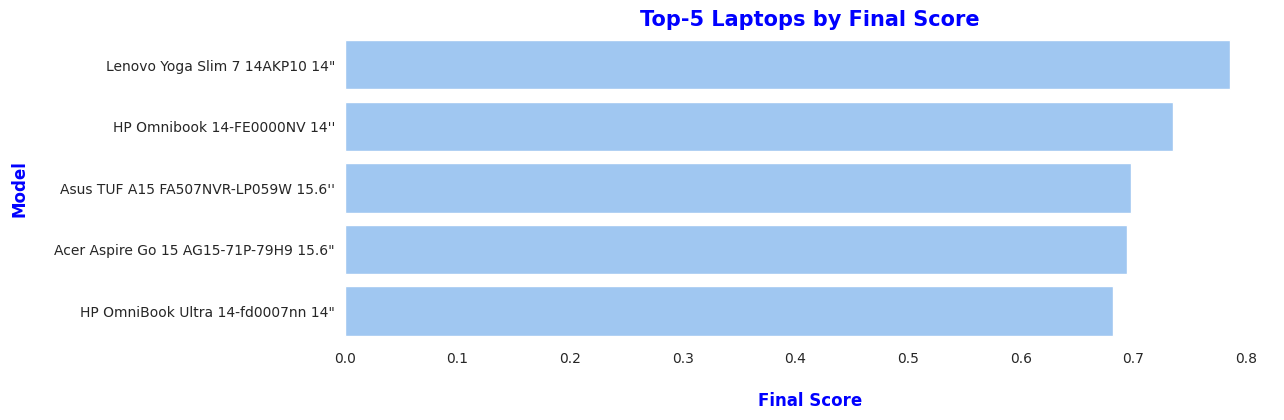

In [9]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_style('white')

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(y='model_', x='Final_Score', data=df.head(5), ax=ax)

ax.set_xlabel('\nFinal Score', weight='bold', fontsize=12, color='blue')
ax.set_ylabel('Model\n', weight='bold', fontsize=12, color='blue')
ax.set_title('Top-5 Laptops by Final Score', weight='bold', fontsize=15, color='blue')

sns.despine(left=True, bottom=True)
fig.savefig('top5_laptops.jpg', dpi=400)
plt.show()

In [31]:
# winner's specs
df.loc[0, :'model']

,0
store,public
product_code,2013279
price_euros,1099
cpu,AMD Ryzen AI 7-350
cores,8
threads,16
cpu_benchmk,24402
ram_type,LPDDR5x
ram_gb,32
storage_gb,1024


In [32]:
# all laptops ranking
df[['model', 'Final_Score', 'price_euros']]

,model,Final_Score,price_euros
0,"Lenovo Yoga Slim 7 14AKP10 14"" FHD OLED",0.785948,1099
1,HP Omnibook 14-FE0000NV 14'' QHD IPS,0.734883,1149
2,Asus TUF A15 FA507NVR-LP059W 15.6'' FHD IPS,0.697934,1249
3,"Acer Aspire Go 15 AG15-71P-79H9 15.6"" FHD TN",0.694042,799
4,"HP OmniBook Ultra 14-fd0007nn 14"" QHD IPS",0.681943,1350
5,Acer Nitro V 15 ANV15-51-94CA 15.6'' FHD IPS,0.641609,1199
6,"Acer Aspire Go 15 AG15-42P-R2WA 15.6"" FHD TN",0.599362,599
7,"Lenovo IdeaPad Slim 5 14AHP9 14"" WUXGA OLED",0.596686,929
8,MSI Cyborg 15 A13VE 15.6'' FHD IPS,0.590554,1099
9,"Lenovo IdeaPad 5 2-in-1 14Q8X9 14"" WUXGA OLED",0.584507,900
